# Kickstarter Projects

# 1.必要ライブラリーの導入と可視化

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
%matplotlib inline

In [2]:
df=pd.read_csv("data/ks-projects-201801.csv")

In [8]:
pandas_profiling.ProfileReport(df)

①Distinctが90%以上のものに関しては1つのカテゴリーに対してのデータ数が少ないので説明変数としては不適であると考えた。
"ID","name"

②似たものを1カテゴリーへと変更する。
"category"と"main_category"は包括関係があるため"main_category"のみを採用とする。
"usd pledged"と"usd_pledged_real"は相関係数が1に近く、"goal"と"usd_goal_real"は相関係数が1に近くなることがヒートマップから分かるので、"usd pledged"と"goal"のみを採用することとする。

③Distinctが1%を超えるものに関しては、データの偏りが多いものがほとんどなのでグループ分割することにする。
"deadline","goal","launched","pledged","backers","usd pledged"

④Distinctが0%近いものに関しては目的変数("state")との関係性を見て決めることとする。
"main_category","currency","country"

# 2.欠損値処理

本データの欠損値の数を確認する。

In [3]:
df.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

"name"に関してはnodataに置き換える。
理由：要素数4つと少ないため一つの要素nodataとすることにする。

In [4]:
df=df.fillna({"name":"nodata"})

"usd pledged"はほとんどが0に偏っているので約1.0%に及ぶ欠損値を0で穴埋めすることにする。

In [5]:
df=df.fillna({"usd pledged":0})

In [6]:
df.isnull().sum()

ID                  0
name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

# 3.カテゴライズ化

# 3.1goal

第一四分位数、平均値、第三四分位数を境界として4つのカテゴリーに分類することにする。

In [7]:
df["goal"]=pd.qcut(df.goal,4,labels=False)
df["goal"].value_counts()

0    100747
2     95128
3     94098
1     88688
Name: goal, dtype: int64

# 3.2pledged

第一四分位数、平均値、第三四分位数を境界として4つのカテゴリーに分類することにする。

In [8]:
df["pledged"]=pd.qcut(df.pledged,4,labels=False)
df["pledged"].value_counts()

0    94871
2    94659
3    94654
1    94477
Name: pledged, dtype: int64

# 3.3backers

第一四分位数、平均値、第三四分位数を境界として4つのカテゴリーに分類することにする。

In [9]:
df["backers"]=pd.qcut(df.backers,4,labels=False)
df["backers"].value_counts()

0    113674
3     93935
2     92340
1     78712
Name: backers, dtype: int64

# 3.4usd pledged

第一四分位数、平均値、第三四分位数を境界として4つのカテゴリーに分類することにする。

In [10]:
df=df.rename(columns={'usd pledged':'usd_pledged'})

In [11]:
df["usd pledged"]=pd.qcut(df.usd_pledged,4,labels=False)
df["usd pledged"].value_counts()

1    94895
0    94666
3    94624
2    94476
Name: usd pledged, dtype: int64

# 3.5deadline

In [12]:
import datetime
df["deadline"]=pd.to_datetime(df["deadline"])
df["deadline"]=df["deadline"].dt.year
df["deadline"]

0         2015
1         2017
2         2013
3         2012
4         2015
          ... 
378656    2014
378657    2011
378658    2010
378659    2016
378660    2011
Name: deadline, Length: 378661, dtype: int64

# 3.6launched

In [13]:
df["launched"]=pd.to_datetime(df["launched"])
df["launched"]=df["launched"].dt.year
df["launched"]

0         2015
1         2017
2         2013
3         2012
4         2015
          ... 
378656    2014
378657    2011
378658    2010
378659    2016
378660    2011
Name: launched, Length: 378661, dtype: int64

# 4.目的変数との関係性

*******************************
main_category


main_category    Art  Comics  Crafts  Dance  Design  Fashion  Film & Video  \
state                                                                        
canceled        2222     842     843    163    4152     2650          5755   
failed         14131    4036    5703   1235   14814    14182         32904   
live             194      76      76     18     305      250           332   
successful     11510    5842    2115   2338   10550     5593         23623   
suspended         96      23      72     13     247      138           117   
undefined          0       0       0      1       2        3           854   
All            28153   10819    8809   3768   30070    22816         63585   

main_category   Food  Games  Journalism  Music  Photography  Publishing  \
state                                                                     
canceled        2211   6202         523   3305          986        3602   
failed         15969  16003        3137  21752         6384       23145   
live             184    287          31    281           48         299   
successful      6085  12518        1012  24197         3305       12300   
suspended        153    220          52    149           55          66   
undefined          0      1           0   2234            1         462   
All            24602  35231        4755  51918        10779       39874   

main_category  Technology  Theater     All  
state                                       
canceled             4715      608   38779  
failed              20616     3708  197719  
live                  377       41    2799  
successful           6434     6534  133956  
suspended             424       21    1846  
undefined               3        1    3562  
All                 32569    10913  378661

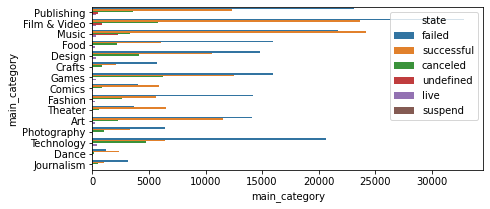


*******************************
currency


currency     AUD    CAD  CHF   DKK    EUR    GBP  HKD  JPY   MXN  NOK   NZD  \
state                                                                         
canceled    1067   2138   84   157   2389   3763   87    8   221  112   151   
failed      4610   8238  465   567  10496  17395  261   16  1015  421   826   
live          70    132   14    16    329    279   35    9   107    8    11   
successful  2011   4137  187   362   3882  12081  216    7   396  163   448   
suspended     89    116   11    14    147    178   19    0    13    6    11   
undefined    103    201    7    13    162    436    0    0     0   12    28   
All         7950  14962  768  1129  17405  34132  618   40  1752  722  1475   

currency     SEK  SGD     USD     All  
state                                  
canceled     209   67   28326   38779  
failed      1001  276  152132  197719  
live          20   28    1741    2799  
successful   509  178  109379  133956  
suspended     19    6    1217    1846  
undefined     30    0    2570    3562  
All         1788  555  295365  378661

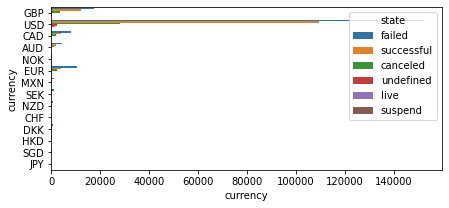


*******************************
deadline


deadline    2009  2010   2011   2012   2013   2014   2015   2016   2017  2018  \
state                                                                           
canceled     108   785   2086   2684   3574   7137   8986   7187   5991   241   
failed       410  4297  11201  20760  21346  37038  44378  31101  27054   134   
live           0     0      0      0      0      0      0      2      5  2792   
successful   384  4008  11768  18063  19198  21202  21075  18824  19348    86   
suspended      0     8     52     51     58    214    737    364    343    19   
undefined      0     0      0      2      2    640   2322    596      0     0   
All          902  9098  25107  41560  44178  66231  77498  58074  52741  3272   

deadline       All  
state               
canceled     38779  
failed      197719  
live          2799  
successful  133956  
suspended     1846  
undefined     3562  
All         378661

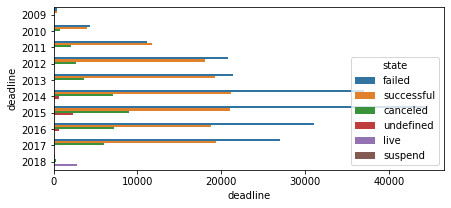


*******************************
goal


goal             0      1      2      3     All
state                                          
canceled      7246   7044   9749  14740   38779
failed       43425  43819  51153  59322  197719
live           687    551    701    860    2799
successful   47831  35142  32375  18608  133956
suspended      648    309    365    524    1846
undefined      910   1823    785     44    3562
All         100747  88688  95128  94098  378661

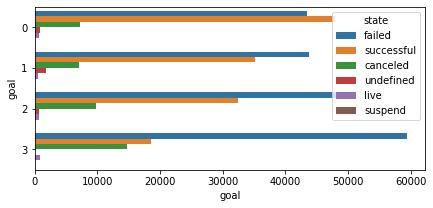


*******************************
launched


launched    1970  2009   2010   2011   2012   2013   2014   2015   2016  \
state                                                                     
canceled       6   150    926   2144   2631   3690   7418   8927   7119   
failed         0   600   4984  11878  20588  21686  38199  44301  30526   
live           0     0      0      0      0      0      0      0      2   
successful     0   579   4593  12171  17892  19415  21107  20971  18766   
suspended      1     0     16     44     52     58    270    721    344   
undefined      0     0      0      0      2      2    751   2380    427   
All            7  1329  10519  26237  41165  44851  67745  77300  57184   

launched     2017  2018     All  
state                            
canceled     5766     2   38779  
failed      24957     0  197719  
live         2675   122    2799  
successful  18462     0  133956  
suspended     340     0    1846  
undefined       0     0    3562  
All         52200   124  378661

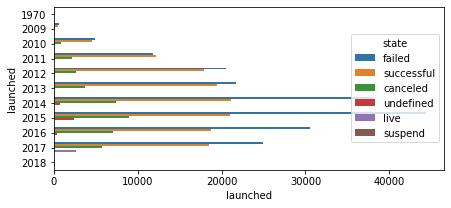


*******************************
pledged


pledged         0      1      2      3     All
state                                         
canceled    16317  11170   7098   4194   38779
failed      75196  71135  37452  13936  197719
live          883    795    620    501    2799
successful    436  10373  48289  74858  133956
suspended     905    347    272    322    1846
undefined    1134    657    928    843    3562
All         94871  94477  94659  94654  378661

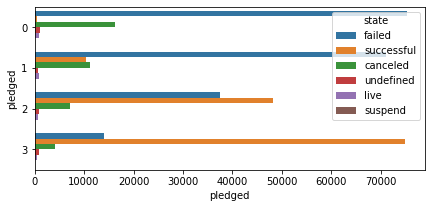


*******************************
backers


backers          0      1      2      3     All
state                                          
canceled     19226   9039   6806   3708   38779
failed       88011  60912  36680  12116  197719
live          1087    696    606    410    2799
successful     791   7757  48011  77397  133956
suspended      997    308    237    304    1846
undefined     3562      0      0      0    3562
All         113674  78712  92340  93935  378661

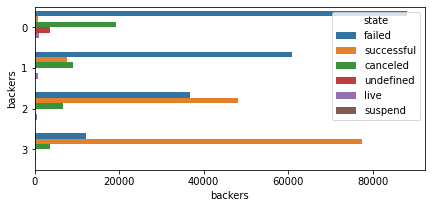


*******************************
country


country      AT    AU   BE     CA   CH    DE    DK    ES    FR     GB  ...  \
state                                                                  ...   
canceled     91  1065   74   2138   84   621   157   331   353   3761  ...   
failed      378  4606  371   8236  465  2499   566  1381  1612  17387  ...   
live         15    70   12    132   14    75    16    52    52    279  ...   
successful  107  2010  152   4134  187   937   360   492   908  12067  ...   
suspended     6    88    8    116   11    39    14    20    14    178  ...   
undefined     0     0    0      0    0     0     0     0     0      0  ...   
All         597  7839  617  14756  761  4171  1113  2276  2939  33672  ...   

country     LU    MX  N,0"    NL   NO    NZ    SE   SG      US     All  
state                                                                   
canceled     4   221    22   396  112   151   209   67   28311   38779  
failed      38  1015   105  1794  420   826  1000  276  152061  197719  
live         1   107     1    35    8    11    20   28    1740    2799  
successful  19   396   105   617  162   448   509  178  109299  133956  
suspended    0    13     2    26    6    11    19    6    1216    1846  
undefined    0     0  3562     0    0     0     0    0       0    3562  
All         62  1752  3797  2868  708  1447  1757  555  292627  378661  

[7 rows x 24 columns]

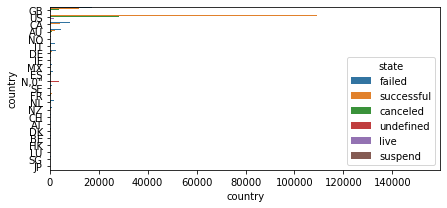


*******************************
usd pledged


usd pledged      0      1      2      3     All
state                                          
canceled     15339  11354   7924   4162   38779
failed       70551  70452  41443  15273  197719
live          1200    882    522    195    2799
successful    3158  11807  44297  74694  133956
suspended      856    400    290    300    1846
undefined     3562      0      0      0    3562
All          94666  94895  94476  94624  378661

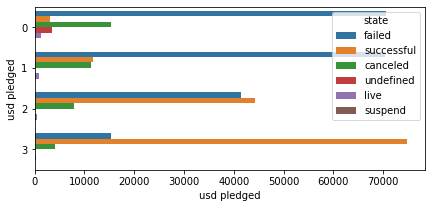

In [14]:
for column in df.columns:
    if column in ["main_category","currency","country","goal","pledged","backers","usd pledged","deadline","launched"]:
        print("*******************************")
        print(column)
        df_c = pd.crosstab(index=df["state"], columns=df[column], margins=True)
        display(df_c) 
        
        plt.figure(figsize=(7,3))
        sns.countplot(y=column, hue="state", hue_order=["failed","successful","canceled","undefined","live","suspend"], data=df)
        plt.xlabel(column)
        plt.show()
        
        print()

# 5.前処理

"ID","name","category","usd_pledged_real","usd_goal_real","usd_pledged"を削除する。

In [15]:
df.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd_pledged', 'usd_pledged_real', 'usd_goal_real', 'usd pledged'],
      dtype='object')

In [16]:
columns=["ID","name","category","usd_pledged_real","usd_goal_real","usd_pledged"]
df_c=df.drop(columns=columns,axis=1)

In [17]:
df_c

main_category currency  deadline  goal  launched  pledged     state  \
0         Publishing      GBP      2015     0      2015        0    failed   
1       Film & Video      USD      2017     3      2017        2    failed   
2       Film & Video      USD      2013     3      2013        1    failed   
3              Music      USD      2012     1      2012        0    failed   
4       Film & Video      USD      2015     3      2015        2  canceled   
...              ...      ...       ...   ...       ...      ...       ...   
378656  Film & Video      USD      2014     3      2014        0  canceled   
378657  Film & Video      USD      2011     0      2011        1    failed   
378658  Film & Video      USD      2010     2      2010        0    failed   
378659    Technology      USD      2016     2      2016        1    failed   
378660           Art      USD      2011     0      2011        1    failed   

        backers country  usd pledged  
0             0      GB            0  
1             2      US            1  
2             1      US            1  
3             0      US            0  
4             2      US            2  
...         ...     ...          ...  
378656        0      US            1  
378657        1      US            1  
378658        0      US            1  
378659        1      US            1  
378660        2      US            2  

[378661 rows x 10 columns]

In [18]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   main_category  378661 non-null  object
 1   currency       378661 non-null  object
 2   deadline       378661 non-null  int64 
 3   goal           378661 non-null  int64 
 4   launched       378661 non-null  int64 
 5   pledged        378661 non-null  int64 
 6   state          378661 non-null  object
 7   backers        378661 non-null  int64 
 8   country        378661 non-null  object
 9   usd pledged    378661 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 28.9+ MB


In [19]:
import category_encoders as ce
def preprocess(data):
    list = []
    for i in data.columns:
        if data[i].dtype == 'object':
            list.append(i)
    oce = ce.OrdinalEncoder(cols=list,handle_unknown='impute')
    data=oce.fit_transform(data)
    return data

In [20]:
#説明変数
y = df_c["state"].values

In [21]:
df_train=df_c.drop('state',axis=1)
df_c=preprocess(df_train)

C:\Users\nagai-yuta\anaconda3\envs\skillupai\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [22]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   main_category  378661 non-null  int32
 1   currency       378661 non-null  int32
 2   deadline       378661 non-null  int64
 3   goal           378661 non-null  int64
 4   launched       378661 non-null  int64
 5   pledged        378661 non-null  int64
 6   backers        378661 non-null  int64
 7   country        378661 non-null  int32
 8   usd pledged    378661 non-null  int64
dtypes: int32(3), int64(6)
memory usage: 21.7 MB


<AxesSubplot:>

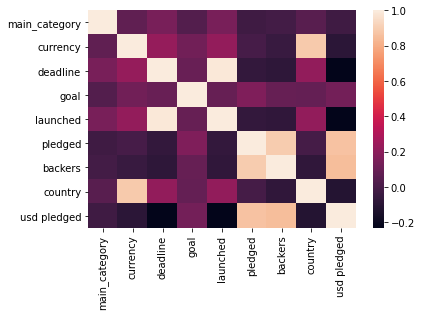

In [23]:
sns.heatmap(df_c.corr())

'launched'と'deadline'は相関係数が1に近いことが分かるので除く

In [24]:
df_c=df_c.drop('deadline',axis=1)

In [25]:
#目的変数
X = df_c.values

# 6.基本処理の定義

基本となるモデル検証を行える処理を定義しておく
・クロスバリエーション
・混同行列を表示する

In [30]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from  sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV

#交差検証法の利用
def crossValidation(model, X, y):
    kf = KFold(n_splits=5, random_state=1234, shuffle=True)
    kf.get_n_splits(X, y)
    df_result = pd.DataFrame()
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        df = pd.DataFrame({"y_test":y_test, "y_pred":y_pred})
        df_result = pd.concat([df_result, df], axis=0)
    return model, df_result


#混同行列を求める
def ConfusionMatrix(y_test,y_pred):
    labels=["canceled","failed","live","successful","suspended","undefined"]
    conf_mat = confusion_matrix(y_test,y_pred)
    print(conf_mat)
    # 正答率を計算
    accuracy =  accuracy_score(y, y_pred)
    print('正答率（Accuracy） = {:.3f}%'.format(100 * accuracy))
    # Precision, Recall, F1-scoreを計算
    precision, recall, f1_score, _ = precision_recall_fscore_support(y, y_pred)
    print('適合率（Precision） = {:.3f}%'.format(100 * precision[0]))
    print('再現率（Recall） = {:.3f}%'.format(100 * recall[0]))
    print('F1値（F1-score） = {:.3f}%'.format(100 * f1_score[0]))

# 7.モデルの検証

・SVM <br>
・ロジスティック回帰 <br>
・k近傍法 <br>
・ランダムフォレスト 

# 7.1SVM

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

#学習データとテストデータを分割する
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#標準化
stdsc = StandardScaler()
X_train = stdsc.fit_transform(X_train)
X_test = stdsc.transform(X_test)

C:\Users\nagai-yuta\anaconda3\envs\skillupai\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\nagai-yuta\anaconda3\envs\skillupai\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\nagai-yuta\anaconda3\envs\skillupai\lib\site-packages\ipykernel\__main__.py:11: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.


In [40]:
from sklearn.svm import LinearSVC

model_svc=LinearSVC()
model_svc,result_s=crossValidation(model_svc,X,y)

C:\Users\nagai-yuta\anaconda3\envs\skillupai\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\nagai-yuta\anaconda3\envs\skillupai\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\nagai-yuta\anaconda3\envs\skillupai\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\nagai-yuta\anaconda3\envs\skillupai\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\nagai-yuta\anaconda3\envs\skillupai\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

In [41]:
y_test=result_s["y_test"]
y_pred=result_s["y_pred"]
ConfusionMatrix(y_test,y_pred)

[[  7714  24109      0   6905      0     51]
 [ 39595 119906      0  37927      0    291]
 [   560   1452      0    777      0     10]
 [ 26055  11985      0  95774      0    142]
 [   346   1044      0    453      0      3]
 [   297    384      0    231      0   2650]]
正答率（Accuracy） = 37.108%
適合率（Precision） = 10.175%
再現率（Recall） = 19.565%
F1値（F1-score） = 13.387%


C:\Users\nagai-yuta\anaconda3\envs\skillupai\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# 7.2ロジスティック回帰

In [42]:
from sklearn.linear_model import SGDClassifier

In [43]:
#学習データとテストデータを分割する
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf_logistic = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True, random_state=1234, tol=1e-3)
model_l,result_l=crossValidation(clf_logistic,X,y)

C:\Users\nagai-yuta\anaconda3\envs\skillupai\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [44]:
y_test=result_l["y_test"]
y_pred=result_l["y_pred"]
ConfusionMatrix(y_test,y_pred)

[[  3550  31665      3   3386     83     92]
 [ 26420 157087      2  13010    672    528]
 [   486   1819      1    463     17     13]
 [ 15145   2644      3 115847    172    145]
 [   189   1294      0    351      9      3]
 [   493    805      0      0      1   2263]]
正答率（Accuracy） = 40.509%
適合率（Precision） = 10.371%
再現率（Recall） = 12.378%
F1値（F1-score） = 11.286%


# 7.3決定木

In [45]:
from sklearn.tree import DecisionTreeClassifier

#学習データとテストデータを分割する
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model_t=DecisionTreeClassifier(max_depth=3)
model_t,result_t=crossValidation(model_t,X,y)

In [46]:
y_test=result_t["y_test"]
y_pred=result_t["y_pred"]
ConfusionMatrix(y_test,y_pred)

[[     0  33542      0   5215      0     22]
 [     0 173958      0  23656      0    105]
 [     0   2085      0    713      0      1]
 [     0  12848      0 121003      0    105]
 [     0   1444      0    400      0      2]
 [     0      0      0      0      0   3562]]
正答率（Accuracy） = 44.827%
適合率（Precision） = 0.000%
再現率（Recall） = 0.000%
F1値（F1-score） = 0.000%


C:\Users\nagai-yuta\anaconda3\envs\skillupai\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# 7.4K近傍法

In [47]:
from sklearn.neighbors import KNeighborsClassifier

#学習データとテストデータを分割する
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model_k=KNeighborsClassifier(n_neighbors=3)
model_k,result_k=crossValidation(model_k,X,y)

In [48]:
y_test=result_k["y_test"]
y_pred=result_k["y_pred"]
ConfusionMatrix(y_test,y_pred)

[[  4489  31074     60   3118     21     17]
 [ 17479 164850    295  14906    113     76]
 [   391   1713     50    641      3      1]
 [  3119  11788     77 118905      3     64]
 [   226   1268      3    343      4      2]
 [    18     56      0     33      0   3455]]
正答率（Accuracy） = 42.505%
適合率（Precision） = 10.306%
再現率（Recall） = 6.836%
F1値（F1-score） = 8.220%
